# Self Attention in Transformers

## Generate Data

In [ ]:
import numpy as np
import math

L, d_k, d_v = 3,2,2
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

In [ ]:
print("Q\n", q)
print("K\n", k)
print("V\n", v)

Q
 [[ 1.46718556 -0.54307583]
 [-0.92201114  1.33947543]
 [-0.92643635  1.37391767]]
K
 [[-0.14788663  0.12504221]
 [ 1.38980759  1.02773425]
 [ 0.04250997 -3.38619662]]
V
 [[ 0.40501676 -0.11814524]
 [ 2.4144589  -0.61711308]
 [-1.25793383 -1.09310971]]


## Self Attention

$$
\text{self attention} = softmax\bigg(\frac{Q.K^T}{\sqrt{d_k}}+M\bigg)
$$

$$
\text{new V} = \text{self attention}.V
$$

In [ ]:
np.matmul(q, k.T)

array([[-0.28488452,  1.48096801,  1.90133154],
       [ 0.30384408,  0.0952067 , -4.57492183],
       [ 0.30880524,  0.12445397, -4.69173817]])

In [ ]:
# Why we need sqrt(d_k) in denominator
q.var(), k.var(), np.matmul(q, k.T).var()

(1.2173907847199892, 2.390557790558945, 5.097697225538967)

In [ ]:
scaled = np.matmul(q, k.T) / math.sqrt(d_k)
q.var(), k.var(), scaled.var()

(1.2173907847199892, 2.390557790558945, 2.5488486127694827)

Notice the reduction in variance of the product

In [ ]:
scaled

array([[-0.20144378,  1.04720252,  1.34444442],
       [ 0.21485021,  0.0673213 , -3.23495825],
       [ 0.21835828,  0.08800225, -3.31755988]])

## Masking

- This is to ensure words don't get context from words generated in the future.
- Not required in the encoders, but required int he decoders

In [ ]:
mask = np.tril(np.ones( (L, L) ))
mask

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [ ]:
mask = np.tril(np.ones( (L, L) ))
mask
mask[mask == 0] = -np.infty
mask[mask == 1] = 0

In [ ]:
mask

array([[  0., -inf, -inf],
       [  0.,   0., -inf],
       [  0.,   0.,   0.]])

In [ ]:
scaled + mask

array([[-0.20144378,        -inf,        -inf],
       [ 0.21485021,  0.0673213 ,        -inf],
       [ 0.21835828,  0.08800225, -3.31755988]])

## Softmax

$$
\text{softmax} = \frac{e^{x_i}}{\sum_j e^x_j}
$$

In [ ]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

In [ ]:
attention_v = softmax(scaled + mask)

In [ ]:
attention_v

array([[1.        , 0.        , 0.        ],
       [0.53681548, 0.46318452, 0.        ],
       [0.52440726, 0.46031571, 0.01527703]])

In [ ]:
attention = np.matmul(attention_v, v)
attention

array([[ 0.40501676, -0.11814524],
       [ 1.33575926, -0.34925942],
       [ 1.30458959, -0.36272253]])

In [ ]:
v

array([[ 0.40501676, -0.11814524],
       [ 2.4144589 , -0.61711308],
       [-1.25793383, -1.09310971]])

# Function

In [ ]:
np.random.seed(2)
L, d_k, d_v = 3,2,2
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None):
  d_model = q.shape[-1]
  scaled = np.matmul(q, k.T) / math.sqrt(d_model)
  if mask is not None:
    scaled = scaled + mask
  attention = softmax(scaled)
  out = np.matmul(attention, v)
  return out, attention

In [ ]:
values, attention = scaled_dot_product_attention(q, k, v)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("attentio_v\n", values)

print("Attention\n", attention)

Q
 [[-0.41675785 -0.05626683]
 [-2.1361961   1.64027081]
 [-1.79343559 -0.84174737]]
K
 [[ 0.50288142 -1.24528809]
 [-1.05795222 -0.90900761]
 [ 0.55145404  2.29220801]]
V
 [[ 0.04153939 -1.11792545]
 [ 0.53905832 -0.5961597 ]
 [-0.0191305   1.17500122]]
attentio_v
 [[ 0.2537593  -0.30516903]
 [ 0.10129328  0.76405618]
 [ 0.45930586 -0.64146812]]
Attention
 [[0.29245479 0.4570973  0.25044791]
 [0.01372793 0.21424812 0.77202395]
 [0.14205121 0.84168316 0.01626562]]


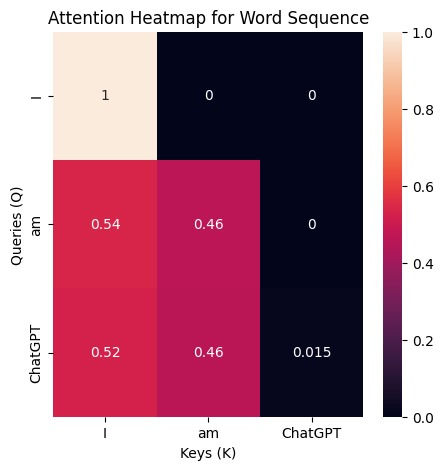

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
tokens = ["I", "am", "ChatGPT"]

# Plot the heatmap using seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(attention, annot=True, xticklabels=tokens, yticklabels=tokens, cbar=True)

# Title and axis labels
plt.title("Attention Heatmap for Word Sequence")
plt.xlabel("Keys (K)")
plt.ylabel("Queries (Q)")
plt.show()


In [ ]:
torch.sqrt(torch.tensor(4))

tensor(2.)

In [ ]:
np.random.seed(2)
L, d_k, d_v = 3,2,2
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

In [ ]:
#attention class for one bathc or only one seq
import torch
import numpy as np
class attention(nn.Module):
  def __init__(self,x,mask=None):
    super().__init__()
    self.inputdim=x.shape[-1]
    self.seqlen=x.shape[0]
    self.q=torch.randn(self.seqlen,self.inputdim)
    self.k=torch.randn(self.seqlen,self.inputdim)
    self.v=torch.randn(self.seqlen,self.inputdim)
    self.mask = mask
    print('q',self.q)
    print('k',self.k)
    print('v',self.k)


  def scaled_dot_product_attention(self, mask=None):
    d_model = q.shape[-1]
    scaled = torch.matmul(self.q, self.k.T) / np.sqrt(d_model)
    if mask is not None:
      scaled = scaled + mask
    attention = self.softmax(scaled)
    scores = torch.matmul(attention, self.v)
    return  attention,scores

  def softmax(self,z):
    return torch.softmax(z,dim=-1)

  def forward(self,x):
    attention,scores=self.scaled_dot_product_attention()
    return attention,scores




In [ ]:
torch.manual_seed(2)
x = torch.randn(3, 2)  # seq len, input dim
self_attention = attention(x)  # Instantiate the attention class

# Get attention, output, and scores by using the attention object like a function
attention, scores = self_attention(x)

# Print the results
print('Input x:', x)
print("Attention:", attention)
print("Scores:", scores)


q tensor([[ 0.5731,  0.5409],
        [-0.3919, -1.0427],
        [ 1.3186,  0.7476]])
k tensor([[-1.3265, -1.2413],
        [-0.1028, -0.9498],
        [ 0.6181, -0.2385]])
v tensor([[-1.3265, -1.2413],
        [-0.1028, -0.9498],
        [ 0.6181, -0.2385]])
Input x: tensor([[ 0.3923, -0.2236],
        [-0.3195, -1.2050],
        [ 1.0445, -0.6332]])
Attention: tensor([[0.1649, 0.3028, 0.5323],
        [0.5396, 0.3101, 0.1503],
        [0.0664, 0.2423, 0.6913]])
Scores: tensor([[ 0.2128, -1.3437],
        [ 0.0589, -0.9731],
        [ 0.2816, -1.4363]])


In [ ]:
#for batch input
x=torch.randn(2,3,2)#batch,seq len,input dim
x

tensor([[[-0.4766,  0.2480],
         [ 0.1559, -0.1607],
         [ 0.4172,  1.0004]],

        [[ 0.6008,  0.1098],
         [-0.8411, -0.2908],
         [-0.1480, -0.9266]]])

In [ ]:
#attention class for n batches
import torch.nn as nn
import numpy as np
class attention(nn.Module):
  def __init__(self,inputdim,mask=None):
    super().__init__()
    self.inputdim=x.shape[-1]
    self.seqlen=x.shape[1]
    self.batchsize=x.shape[0]
    self.q=torch.randn(self.batchsize,self.seqlen,self.inputdim)
    self.k=torch.randn(self.batchsize,self.seqlen,self.inputdim)
    self.v=torch.randn(self.batchsize,self.seqlen,self.inputdim)
    self.mask = mask
    print('q',self.q)
    print('k',self.k)
    print('v',self.k)


  def scaled_dot_product_attention(self, mask=None):
    d_model = self.q.shape[-1]
    scaled = torch.matmul(self.q, self.k.transpose(-2,-1)) / np.sqrt(d_model)
    if mask is not None:
      scaled = scaled + mask
    attention = self.softmax(scaled)
    scores = torch.matmul(attention, self.v)
    return  attention,scores

  def softmax(self,z):
    return torch.softmax(z,dim=-1)

  def forward(self,x):
    attention,scores=self.scaled_dot_product_attention()
    return attention,scores



torch.manual_seed(2)
#x = torch.randn(3, 2)  # seq len, input dim
x=torch.randn(2,3,2)#batch,seq len,input dim
print('Input x:', x)
self_attention = attention(x)  # Instantiate the attention class

# Get attention, output, and scores by using the attention object like a function
attention, scores = self_attention(x)

#Print the results

print("Attention:", attention)

print("Scores:", scores)


Input x: tensor([[[ 0.3923, -0.2236],
         [-0.3195, -1.2050],
         [ 1.0445, -0.6332]],

        [[ 0.5731,  0.5409],
         [-0.3919, -1.0427],
         [ 1.3186,  0.7476]]])
q tensor([[[-1.3265, -1.2413],
         [-0.1028, -0.9498],
         [ 0.6181, -0.2385]],

        [[ 0.0245, -0.4912],
         [-0.0591, -1.5653],
         [ 0.4258, -1.4818]]])
k tensor([[[-0.4766,  0.2480],
         [ 0.1559, -0.1607],
         [ 0.4172,  1.0004]],

        [[ 0.6008,  0.1098],
         [-0.8411, -0.2908],
         [-0.1480, -0.9266]]])
v tensor([[[-0.4766,  0.2480],
         [ 0.1559, -0.1607],
         [ 0.4172,  1.0004]],

        [[ 0.6008,  0.1098],
         [-0.8411, -0.2908],
         [-0.1480, -0.9266]]])
Attention: tensor([[[0.4964, 0.3927, 0.1109],
         [0.3543, 0.4453, 0.2003],
         [0.2692, 0.3803, 0.3505]],

        [[0.2828, 0.3170, 0.4002],
         [0.1694, 0.2803, 0.5503],
         [0.2299, 0.2266, 0.5435]]])
Scores: tensor([[[-0.8393,  0.8577],
         [-

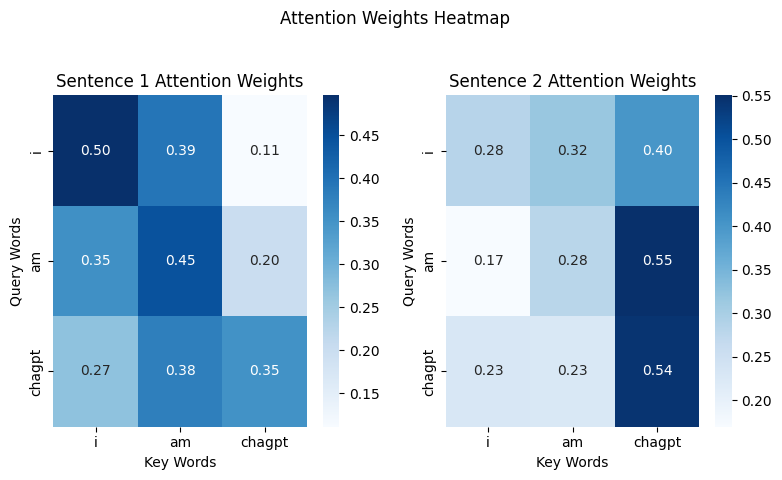

In [ ]:
# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
fig.suptitle('Attention Weights Heatmap')

sentence_labels = [["i", "am", "chagpt"] for _ in range(2)]

for i in range(2):  # Iterate for each batch
    sns.heatmap(
        attention[i].detach().numpy(),
        annot=True, fmt=".2f", cmap="Blues",
        xticklabels=sentence_labels[i],
        yticklabels=sentence_labels[i],
        ax=axes[i]
    )
    axes[i].set_title(f"Sentence {i + 1} Attention Weights")
    axes[i].set_xlabel("Key Words")
    axes[i].set_ylabel("Query Words")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
#using weight matrices n bathc only
"""If the input has shape (batch_size, seq_len, input_dim),
then typically have shape (input_dim, input_dim) to map each input vector to the same output dimension"""


import torch
import torch.nn as nn
import numpy as np

class Attention(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.input_dim = input_dim

        # Define learnable weight matrices for Q, K, V
        self.W_q = nn.Linear(input_dim, input_dim)
        self.W_k = nn.Linear(input_dim, input_dim)
        self.W_v = nn.Linear(input_dim, input_dim)

    def scaled_dot_product_attention(self, q, k, v, mask=None):
        d_model = q.shape[-1]
        scaled_scores = torch.matmul(q, k.transpose(-2, -1)) / np.sqrt(d_model)

        if mask is not None:
            scaled_scores += mask

        attention_weights = torch.softmax(scaled_scores, dim=-1)
        output = torch.matmul(attention_weights, v)

        return attention_weights, output

    def forward(self, x):
        # Compute Q, K, V from input x
        q = self.W_q(x)
        k = self.W_k(x)
        v = self.W_v(x)

        attention, scores = self.scaled_dot_product_attention(q, k, v)
        return attention, scores


# Testing the attention class with batch input
torch.manual_seed(2)
x = torch.randn(2, 3, 2)  # (batch_size, seq_len, input_dim)
print('Input x:', x)

self_attention = Attention(input_dim=x.shape[-1])  # Instantiate the attention class

# Get attention, output, and scores by using the attention object like a function
attention_weights, scores = self_attention(x)

# Print the results
print("Attention Weights:", attention_weights)
print("Scores (Contextual Vectors):", scores)


Input x: tensor([[[ 0.3923, -0.2236],
         [-0.3195, -1.2050],
         [ 1.0445, -0.6332]],

        [[ 0.5731,  0.5409],
         [-0.3919, -1.0427],
         [ 1.3186,  0.7476]]])
Attention Weights: tensor([[[0.3422, 0.2825, 0.3753],
         [0.3657, 0.2341, 0.4002],
         [0.3532, 0.2550, 0.3918]],

        [[0.3233, 0.3378, 0.3390],
         [0.3536, 0.1953, 0.4511],
         [0.3182, 0.3520, 0.3297]]], grad_fn=<SoftmaxBackward0>)
Scores (Contextual Vectors): tensor([[[ 0.0911, -0.4697],
         [ 0.0968, -0.4922],
         [ 0.0951, -0.4823]],

        [[-0.0874, -0.7630],
         [-0.0862, -0.8941],
         [-0.0871, -0.7503]]], grad_fn=<UnsafeViewBackward0>)


In [ ]:
#2input 2 outputs
torch.manual_seed(3)
nn.Linear(2,2).weight,nn.Linear(2,2).bias#each time u run u get new random values  osuse manul seed

(Parameter containing:
 tensor([[-0.7011, -0.5578],
         [-0.3029, -0.6690]], requires_grad=True),
 Parameter containing:
 tensor([-0.0693,  0.4235], requires_grad=True))

In [ ]:
#multihead attention class for n batches for 1 head same as self attention
import torch.nn as nn
import numpy as np
class multihead_attention(nn.Module):
  def __init__(self,inputdim,mask=None,heads=None):
    super().__init__()
    self.wq=nn.Linear(inputdim,inputdim)
    self.wk=nn.Linear(inputdim,inputdim)
    self.wv=nn.Linear(inputdim,inputdim)
    self.mask = mask
    self.heads=heads
    print('\nwq w and b\n',self.wq.weight,self.wq.bias)
    print('\nwk w and b\n',self.wk.weight,self.wk.bias)
    print('\nwv w and b\n',self.wv.weight,self.wv.bias)



  def scaled_dot_product_attention(self,q,k,v):
    d_model = q.shape[-1]
    scaled = torch.matmul(q, k.transpose(-2,-1)) / np.sqrt(d_model)
    if self.mask is not None:
      scaled = scaled + self.mask
    attention = torch.softmax(scaled,dim=-1)
    scores = torch.matmul(attention,v)
    return  attention,scores

  def softmax(self,z):
    return torch.softmax(z,dim=-1)

  def forward(self,x):
    q=self.wq(x)
    k=self.wq(x)
    v=self.wq(x)
    print('q',q)
    print('k',k)
    print('v',v)
    attention,scores=self.scaled_dot_product_attention(q,k,v)
    return attention,scores



torch.manual_seed(2)
#x = torch.randn(3, 2)  # seq len, input dim
x=torch.randn(2,3,2)#batch,seq len,input dim
print('Input x:', x)
multiattention = multihead_attention(x.shape[-1])  # Instantiate the attention class

# Get attention, output, and scores by using the attention object like a function
attention, scores = multiattention(x)

#Print the results

print("Attention:", attention)

print("Scores:", scores)


Input x: tensor([[[ 0.3923, -0.2236],
         [-0.3195, -1.2050],
         [ 1.0445, -0.6332]],

        [[ 0.5731,  0.5409],
         [-0.3919, -1.0427],
         [ 1.3186,  0.7476]]])

wq w and b
 Parameter containing:
tensor([[-0.0672,  0.1862],
        [-0.0339, -0.3959]], requires_grad=True) Parameter containing:
tensor([-0.4008, -0.3435], requires_grad=True)

wk w and b
 Parameter containing:
tensor([[-0.6423, -0.4589],
        [ 0.1664,  0.4654]], requires_grad=True) Parameter containing:
tensor([ 0.0348, -0.3241], requires_grad=True)

wv w and b
 Parameter containing:
tensor([[ 0.3108, -0.2714],
        [-0.1566, -0.3876]], requires_grad=True) Parameter containing:
tensor([-0.2220, -0.6552], requires_grad=True)
q tensor([[[-0.4688, -0.2683],
         [-0.6037,  0.1444],
         [-0.5889, -0.1283]],

        [[-0.3386, -0.5772],
         [-0.5686,  0.0826],
         [-0.3502, -0.6843]]], grad_fn=<ViewBackward0>)
k tensor([[[-0.4688, -0.2683],
         [-0.6037,  0.1444],
     

In [ ]:
x=torch.randn(2,3,2)
w=nn.Linear(2,2)
y=w(x)
y.shape

torch.Size([2, 3, 2])

In [ ]:
y

tensor([[[ 0.0391, -0.1455],
         [ 0.3825, -0.7899],
         [ 0.3771, -1.7423]],

        [[ 0.0761, -0.4451],
         [ 0.6037, -0.0096],
         [ 0.5174, -0.9399]]], grad_fn=<ViewBackward0>)

In [ ]:
w.weight,w.bias

(Parameter containing:
 tensor([[ 0.2655, -0.1499],
         [-0.2327, -0.5116]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3639, -0.4971], requires_grad=True))

In [ ]:
torch.manual_seed(3)
q=torch.randn(2,3,4)
q

tensor([[[-0.0766,  0.3599, -0.7820,  0.0715],
         [ 0.6648, -0.2868,  1.6206, -1.5967],
         [ 0.4046,  0.6113,  0.7604, -0.0336]],

        [[-0.3448,  0.4937, -0.0776, -1.8054],
         [ 0.4851,  0.2052,  0.3384,  1.3528],
         [ 0.3736,  0.0134,  0.7737, -0.1092]]])

In [ ]:
#we need to split dmodel into h heads
q.view(q.shape[0],3,2,2)#bathch,seqlen,heads,headsdim


tensor([[[[-0.0766,  0.3599],
          [-0.7820,  0.0715]],

         [[ 0.6648, -0.2868],
          [ 1.6206, -1.5967]],

         [[ 0.4046,  0.6113],
          [ 0.7604, -0.0336]]],


        [[[-0.3448,  0.4937],
          [-0.0776, -1.8054]],

         [[ 0.4851,  0.2052],
          [ 0.3384,  1.3528]],

         [[ 0.3736,  0.0134],
          [ 0.7737, -0.1092]]]])

In [ ]:
q.view(q.shape[0],2,2,2).shape

torch.Size([2, 2, 2, 2])

In [ ]:
torch.manual_seed(3)
q=torch.randn(2,3,4)
q,q.view(q.shape[0],2,3,2),q.view(q.shape[0],2,3,2).permute(0,2,1,3)

(tensor([[[-0.0766,  0.3599, -0.7820,  0.0715],
          [ 0.6648, -0.2868,  1.6206, -1.5967],
          [ 0.4046,  0.6113,  0.7604, -0.0336]],
 
         [[-0.3448,  0.4937, -0.0776, -1.8054],
          [ 0.4851,  0.2052,  0.3384,  1.3528],
          [ 0.3736,  0.0134,  0.7737, -0.1092]]]),
 tensor([[[[-0.0766,  0.3599],
           [-0.7820,  0.0715],
           [ 0.6648, -0.2868]],
 
          [[ 1.6206, -1.5967],
           [ 0.4046,  0.6113],
           [ 0.7604, -0.0336]]],
 
 
         [[[-0.3448,  0.4937],
           [-0.0776, -1.8054],
           [ 0.4851,  0.2052]],
 
          [[ 0.3384,  1.3528],
           [ 0.3736,  0.0134],
           [ 0.7737, -0.1092]]]]),
 tensor([[[[-0.0766,  0.3599],
           [ 1.6206, -1.5967]],
 
          [[-0.7820,  0.0715],
           [ 0.4046,  0.6113]],
 
          [[ 0.6648, -0.2868],
           [ 0.7604, -0.0336]]],
 
 
         [[[-0.3448,  0.4937],
           [ 0.3384,  1.3528]],
 
          [[-0.0776, -1.8054],
           [ 0.3736,  0.

In [ ]:
q.shape,q.view(q.shape[0],2,3,2).shape,q.view(q.shape[0],2,3,2).permute(0,2,1,3).shape#permute and view diff

(torch.Size([2, 3, 4]), torch.Size([2, 2, 3, 2]), torch.Size([2, 3, 2, 2]))

In [ ]:
torch.tril(torch.ones(3,3))

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])

In [ ]:
-torch.inf,-torch.sqrt(torch.tensor(2))

(-inf, tensor(-1.4142))

In [ ]:
torch.manual_seed(3)
q=torch.randn(2,4,4)
torch.tril(torch.ones( q.shape[-2],q.shape[-1] ))

tensor([[1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.]])

In [ ]:
import torch

def f1(q, k, v, mask=None):
    dk = torch.tensor(q.shape[-1], dtype=torch.float32)
    scaled = torch.matmul(q, k.transpose(-2, -1)) / torch.sqrt(dk)

    if mask is not None:
        # Create a tensor of ones with shape (seq_len, seq_len)
        mask = torch.ones(q.shape[-2], q.shape[-1], device=q.device)
        mask = torch.tril(mask)  # Apply the lower triangular mask

        # Set the upper triangle to -inf and the lower triangle to 0
        mask[mask == 0] = -torch.inf
        mask[mask == 1] = 0
        print('mask',mask)
        # Add the mask to the scaled logits
        scaled = scaled + mask
        print('scaled',scaled)
    attention = torch.softmax(scaled, dim=-1)
    scores = torch.matmul(attention, v)

    print("Attention Scores:")
    print(attention)
    print("Scores:")
    print(scores)

# Example usage
torch.manual_seed(3)
q = torch.randn(2, 3, 3)
k = torch.randn(2, 3, 3)
v = torch.randn(2, 3, 3)

f1(q, k, v, mask=True)


mask tensor([[0., -inf, -inf],
        [0., 0., -inf],
        [0., 0., 0.]])
scaled tensor([[[-0.1046,    -inf,    -inf],
         [ 0.7379,  2.9088,    -inf],
         [ 0.1956,  0.2048, -0.3698]],

        [[-0.3592,    -inf,    -inf],
         [-0.6748,  2.0231,    -inf],
         [-0.3402,  0.3450, -0.0567]]])
Attention Scores:
tensor([[[1.0000, 0.0000, 0.0000],
         [0.1024, 0.8976, 0.0000],
         [0.3880, 0.3916, 0.2204]],

        [[1.0000, 0.0000, 0.0000],
         [0.0631, 0.9369, 0.0000],
         [0.2319, 0.4602, 0.3079]]])
Scores:
tensor([[[-1.5835,  1.3960, -1.3898],
         [-0.3052,  0.4279, -0.0121],
         [-0.8141,  0.6635, -0.5603]],

        [[-0.8388, -0.6851, -0.3094],
         [ 0.4306, -0.8698,  0.5067],
         [ 0.4878, -0.6292, -0.7714]]])


In [ ]:
#multihead attention class for n batches for n head same as self attention
#final
# own implementation
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




class multihead_attention(nn.Module):
  def __init__(self,inputdim,dmodel,masking=None,heads=1):
    super().__init__()
    self.heads=heads
    self.masking = masking
    assert dmodel % heads == 0, "Embedding dimension must be divisible by num_heads"
    self.inputdim=inputdim
    self.dmodel=dmodel
    self.head_dim = self.dmodel //self.heads
    self.wq=nn.Linear(self.inputdim,self.dmodel)
    self.wk=nn.Linear(self.inputdim,self.dmodel)
    self.wv=nn.Linear(self.inputdim,self.dmodel)
    # print('\nwq w and b\n',self.wq.weight,self.wq.bias)
    # print('\nwk w and b\n',self.wk.weight,self.wk.bias)
    # print('\nwv w and b\n',self.wv.weight,self.wv.bias)
    print('heads =',self.heads)

  def scaled_dot_product_attention(self,q,k,v):
    dk = torch.tensor(q.shape[-1], dtype=torch.float32)
    scaled = torch.matmul(q, k.transpose(-2, -1)) / torch.sqrt(dk)

    if self.masking is not None:
        # Create a tensor of ones with shape (seq_len, seq_len)
        mask = torch.ones(q.shape[2],q.shape[2], device=q.device)
        mask = torch.tril(mask)  # Apply the lower triangular mask

        # Set the upper triangle to -inf and the lower triangle to 0
        mask[mask == 0] = -torch.inf
        mask[mask == 1] = 0
        print('mask',mask.shape)
        # Add the mask to the scaled logits
        scaled = scaled + mask
        print('scaled',scaled.shape)
    attention = torch.softmax(scaled, dim=-1)
    scores = torch.matmul(attention, v)
    return attention, scores

  def softmax(self,z):
    return torch.softmax(z,dim=-1)

  def forward(self,x):
    batch_size, sequence_length, input_dim = x.size()
    q=self.wq(x)
    k=self.wk(x)
    v=self.wv(x)
    #print('orig q',q)
    #print('orig k',k)
    #print('orig v',v)
    #split into heads
    q=q.view(batch_size,sequence_length,self.heads,self.head_dim)
    k=k.view(batch_size,sequence_length,self.heads,self.head_dim)
    v=v.view(batch_size,sequence_length,self.heads,self.head_dim)
    q=q.permute(0,2,1,3)#reardding dim second arg as head for scaled dot prod attention mulitpcation
    k=k.permute(0,2,1,3)
    v=v.permute(0,2,1,3)
    print('q',q.shape)
    print('k',k.shape)
    print('v',v.shape)

    attention,scores=self.scaled_dot_product_attention(q,k,v)
    return attention,scores

def plot_multhead(attention, sentences):
    # Plot attention for each head
    num_batches = attention.shape[0]
    num_heads = attention.shape[1]
    sequence_length = attention.shape[2]

    # Create a figure with subplots
    fig, axes = plt.subplots(num_batches, num_heads, figsize=(5 * num_heads, 5 * num_batches))  # Adjust size as needed
    if num_heads == 1:
        axes = [axes]  # Make axes iterable for the case of a single head
    if num_batches == 1:
        axes = [axes]  # Make axes iterable for the case of a single batch

    # Tokens for x-axis labels from the input sentences
    for batch_idx in range(num_batches):
        for head_idx in range(num_heads):
            ax = axes[batch_idx][head_idx] if num_batches > 1 else axes[head_idx]
            sns.heatmap(attention[batch_idx, head_idx].detach().numpy(), annot=True, cmap="Blues", ax=ax)

            # Set the x and y axis labels as the words from the sentences
            sentence = sentences[batch_idx]
            ax.set_title(f"Attention Heatmap for Batch {batch_idx + 1}, Head {head_idx + 1}")
            ax.set_xticklabels(sentence, rotation=45, ha="right")  # Set word labels on x-axis
            ax.set_yticklabels(sentence, rotation=0)  # Optional: Set word labels on y-axis

    plt.tight_layout()
    plt.show()



torch.manual_seed(2)
input_dim = 2
d_model =6
num_heads = 3
batch_size =2
sequence_length = 4

x=torch.randn(batch_size,sequence_length,input_dim)#batch,seq len,input dim
print('Input x:', x)
multiattention = multihead_attention(input_dim,d_model,heads=num_heads,masking=True)  # Instantiate the attention class

# Get attention, output, and scores by using the attention object like a function
attention, scores = multiattention(x)

#Print the results

#print("Attention:", attention)
print('attention shape',attention.shape)

#print("Scores:", scores)
print("Scores:", scores.shape)
# Example sentences: "I am GPT" and "Good to know"
sentences = [["I", "am", "GPT"], ["Good", "to", "know"]]
#plot_multhead(attention, sentences)


Input x: tensor([[[-1.0408,  0.9166],
         [-1.3042, -1.1097],
         [-1.2188,  1.1676],
         [-1.0574, -0.1188]],

        [[-0.9078,  0.3452],
         [-0.5713, -0.2351],
         [ 1.0076, -0.7529],
         [-0.2250, -0.4327]]])
heads = 3
q torch.Size([2, 3, 4, 2])
k torch.Size([2, 3, 4, 2])
v torch.Size([2, 3, 4, 2])
mask torch.Size([4, 4])
scaled torch.Size([2, 3, 4, 4])
attention shape torch.Size([2, 3, 4, 4])
Scores: torch.Size([2, 3, 4, 2])


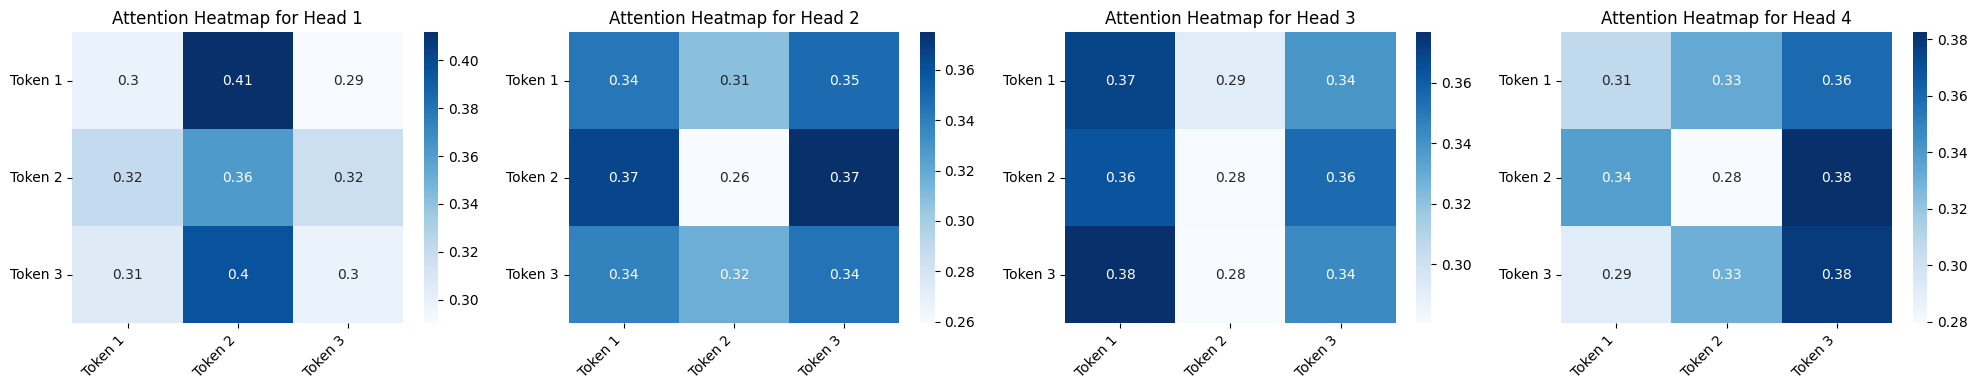

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multhead(attention):
    # Plot attention for each head
    batch_idx = 0  # You can loop for all batches if needed
    num_heads = attention.shape[1]
    sequence_length = attention.shape[2]

    # Create a figure with subplots
    fig, axes = plt.subplots(1, num_heads, figsize=(5 * num_heads, 4))  # Adjust size as needed
    if num_heads == 1:
        axes = [axes]  # Make axes iterable for the case of a single head

    # Tokens for x-axis labels
    tokens = [f"Token {i+1}" for i in range(sequence_length)]

    for head_idx in range(num_heads):
        ax = axes[head_idx]
        sns.heatmap(attention[batch_idx, head_idx].detach().numpy(), annot=True, cmap="Blues", ax=ax)

        # Set the x and y axis labels
        ax.set_title(f"Attention Heatmap for Head {head_idx + 1}")
        ax.set_xticklabels(tokens, rotation=45, ha="right")  # Set token labels on x-axis
        ax.set_yticklabels(tokens, rotation=0)  # Optional: Set token labels on y-axis

    plt.tight_layout()
    plt.show()

# Call the plot function
plot_multhead(attention)


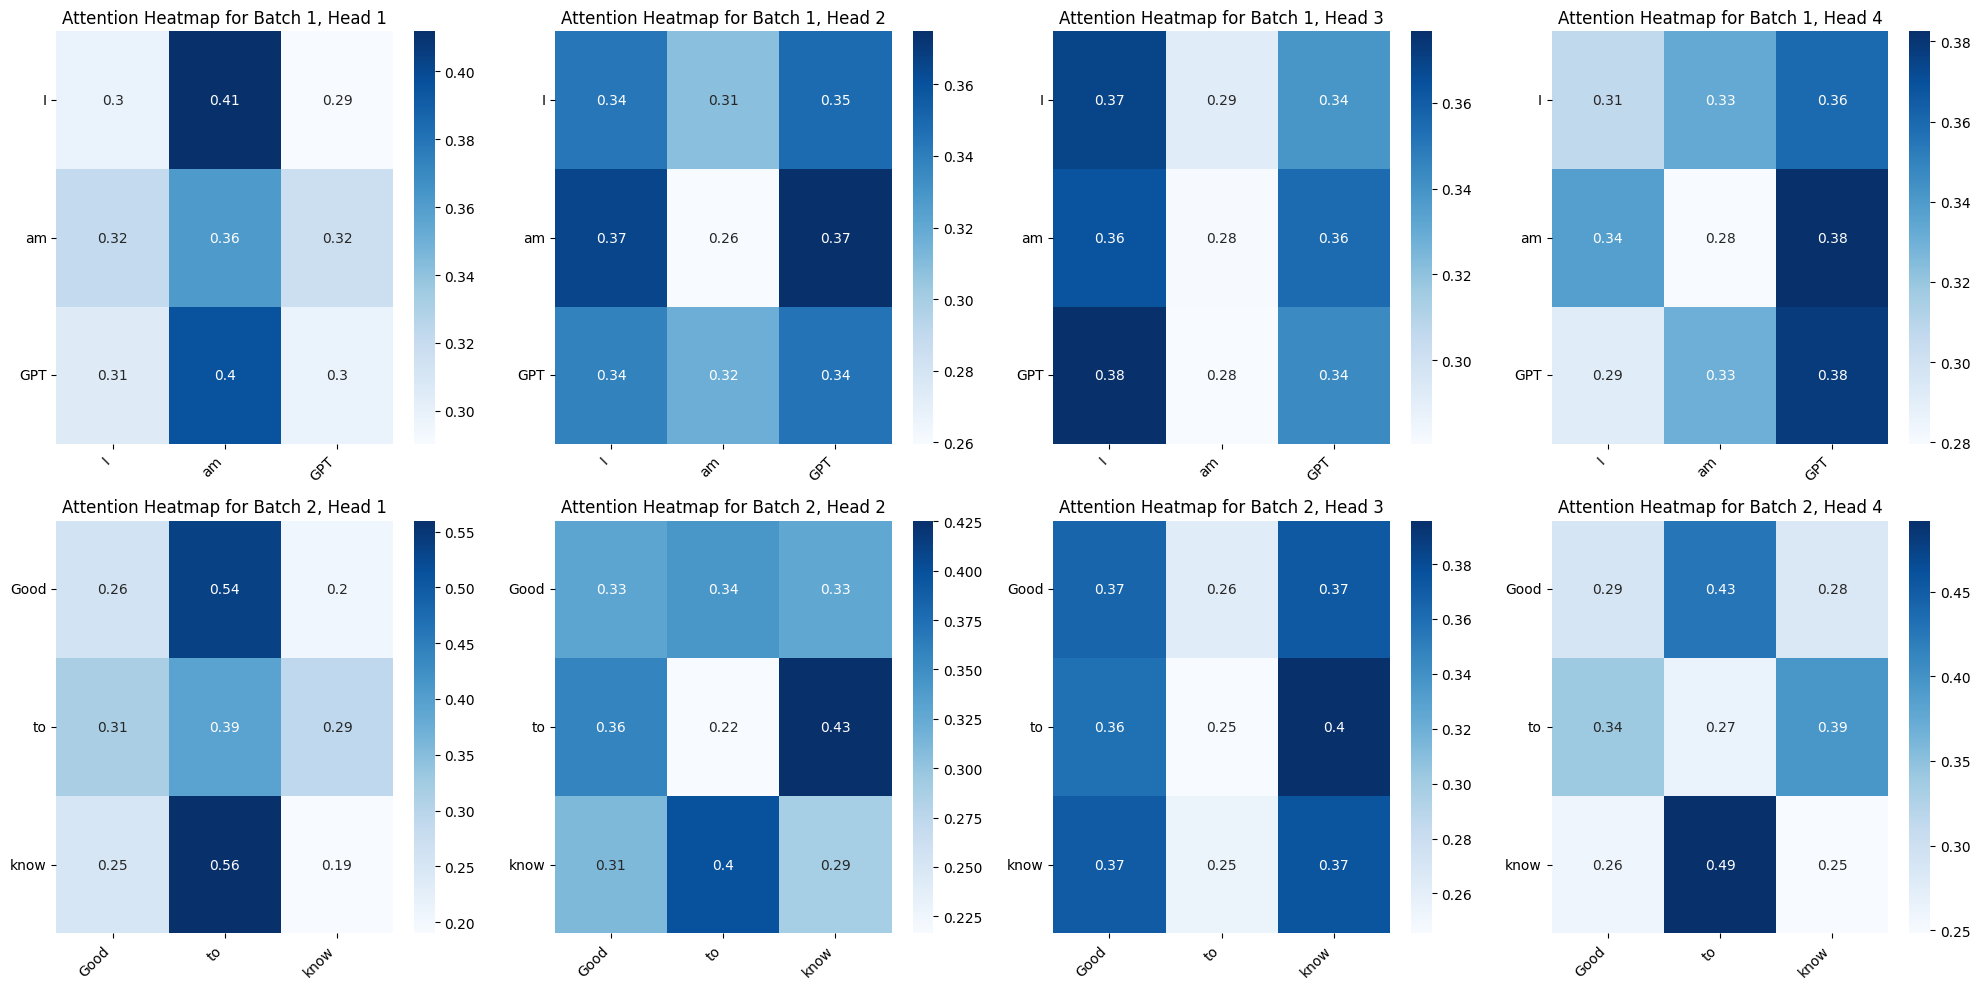

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multhead(attention, sentences):
    # Plot attention for each head
    num_batches = attention.shape[0]
    num_heads = attention.shape[1]
    sequence_length = attention.shape[2]

    # Create a figure with subplots
    fig, axes = plt.subplots(num_batches, num_heads, figsize=(5 * num_heads, 5 * num_batches))  # Adjust size as needed
    if num_heads == 1:
        axes = [axes]  # Make axes iterable for the case of a single head
    if num_batches == 1:
        axes = [axes]  # Make axes iterable for the case of a single batch

    # Tokens for x-axis labels from the input sentences
    for batch_idx in range(num_batches):
        for head_idx in range(num_heads):
            ax = axes[batch_idx][head_idx] if num_batches > 1 else axes[head_idx]
            sns.heatmap(attention[batch_idx, head_idx].detach().numpy(), annot=True, cmap="Blues", ax=ax)

            # Set the x and y axis labels as the words from the sentences
            sentence = sentences[batch_idx]
            ax.set_title(f"Attention Heatmap for Batch {batch_idx + 1}, Head {head_idx + 1}")
            ax.set_xticklabels(sentence, rotation=45, ha="right")  # Set word labels on x-axis
            ax.set_yticklabels(sentence, rotation=0)  # Optional: Set word labels on y-axis

    plt.tight_layout()
    plt.show()

# Example sentences: "I am GPT" and "Good to know"
sentences = [["I", "am", "GPT"], ["Good", "to", "know"]]
plot_multhead(attention, sentences)

In [ ]:
#multihead attention using numpy
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None):
    d_k = q.shape[-1]
    scaled = np.matmul(q, k.T) / math.sqrt(d_k)
    if mask is not None:
        scaled = scaled + mask
    attention = softmax(scaled)
    out = np.matmul(attention, v)
    return out, attention

# Multi-head Attention function
def multi_head_attention(q, k, v, num_heads=2):
    """
    Multi-head attention mechanism with specified number of heads.

    Args:
    - q, k, v: query, key, and value matrices
    - num_heads: Number of attention heads

    Returns:
    - Concatenated output from all attention heads and the attention maps
    """
    assert q.shape[1] % num_heads == 0, "Embedding dimension must be divisible by num_heads"

    head_dim = q.shape[1] // num_heads

    # Split q, k, v for each head
    q_heads = np.array(np.split(q, num_heads, axis=-1))
    k_heads = np.array(np.split(k, num_heads, axis=-1))
    v_heads = np.array(np.split(v, num_heads, axis=-1))

    attention_outputs = []
    attention_maps = []

    for i in range(num_heads):
        out, attention = scaled_dot_product_attention(q_heads[i], k_heads[i], v_heads[i])
        attention_outputs.append(out)
        attention_maps.append(attention)

    # Concatenate outputs from all heads
    print('attention_output',attention_outputs)
    concatenated_output = np.concatenate(attention_outputs, axis=-1)
    return concatenated_output, attention_maps

# Generate random q, k, v as given
L, d_k, d_v = 3, 4,4
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

# Apply multi-head attention
num_heads = 4
output, attention_maps = multi_head_attention(q, k, v, num_heads=num_heads)

print("Input Q:\n", q)
print("Input K:\n", k)
print("Input V:\n", v)
print("\nOutput after Multi-Head Attention:\n", output)

# Plot the attention maps for each head
tokens = ["I", "am", "ChatGPT"]
fig, axes = plt.subplots(1, num_heads, figsize=(15, 5))

for i in range(num_heads):
    sns.heatmap(attention_maps[i], annot=True, cmap='Blues', xticklabels=tokens, yticklabels=tokens, cbar=True, ax=axes[i])
    axes[i].set_title(f"Head {i+1} Attention")
    axes[i].set_xlabel("Keys (K)")
    axes[i].set_ylabel("Queries (Q)")

plt.tight_layout()
plt.show()


In [ ]:
q.shape[1]//3

1

In [ ]:
q

array([[ 1.49011329, -0.56310684, -1.34821423, -0.90496438],
       [-1.01167136,  0.06952162,  1.16321428,  2.7645599 ],
       [-0.42109332,  0.80756037,  0.05572551, -2.60140516]])

In [ ]:
 np.array(np.split(q, 2, axis=-1)).shape

(2, 3, 2)

In [ ]:
 np.array(np.split(q, 2, axis=-1))

array([[[ 1.49011329, -0.56310684],
        [-1.01167136,  0.06952162],
        [-0.42109332,  0.80756037]],

       [[-1.34821423, -0.90496438],
        [ 1.16321428,  2.7645599 ],
        [ 0.05572551, -2.60140516]]])

In [ ]:
512//8

64

Output after Multi-Head Attention:
 [[[-1.4828785  -0.07412343 -0.2533214   1.96585238]
  [-1.66523979 -0.02408896 -0.09970823  0.52037312]
  [-1.42320825 -0.06577388 -0.29025327  0.99061619]]]


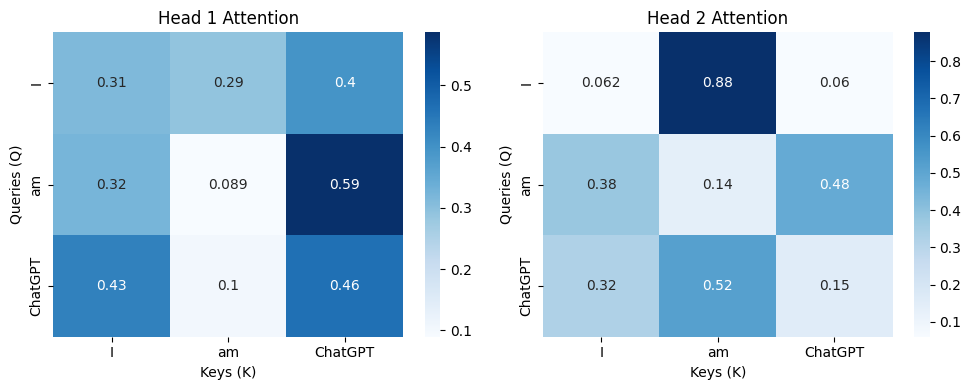

array([[[-0.41675785, -0.05626683, -2.1361961 ,  1.64027081],
        [-1.79343559, -0.84174737,  0.50288142, -1.24528809],
        [-1.05795222, -0.90900761,  0.55145404,  2.29220801]]])

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns


def softmax(x, axis=-1):
    exp_x = np.exp(x - np.max(x, axis=axis, keepdims=True))  # Numerical stability
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)


def scaled_dot_product_attention(q, k, v, mask=None):
    d_k = q.shape[-1]
    # Transpose k for correct dot product
    scores = np.matmul(q, k.transpose(0, 1, 3, 2)) / math.sqrt(d_k)

    if mask is not None:
        scores += mask

    attention = softmax(scores, axis=-1)
    values = np.matmul(attention, v)
    return values, attention


def multi_head_attention(q, k, v, num_heads=2):
    batch_size, seq_len, d_model = q.shape
    head_dim = d_model // num_heads
    assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

    # Reshape and split into multiple heads
    def split_heads(x):
        reshaped = x.reshape(batch_size, seq_len, num_heads, head_dim)
        return np.transpose(reshaped, axes=(0, 2, 1, 3))  # (batch_size, num_heads, seq_len, head_dim)

    q_heads = split_heads(q)
    k_heads = split_heads(k)
    v_heads = split_heads(v)

    # Compute attention for all heads in parallel
    attention_output, attention_weights = scaled_dot_product_attention(q_heads, k_heads, v_heads)

    # Concatenate all attention outputs
    attention_output = np.transpose(attention_output, axes=(0, 2, 1, 3)).reshape(batch_size, seq_len, d_model)

    return attention_output, attention_weights


# Example setup
np.random.seed(2)
L, d_model, num_heads = 3, 4, 2  # Sequence length, model dimension, and number of heads
q = np.random.randn(1, L, d_model)
k = np.random.randn(1, L, d_model)
v = np.random.randn(1, L, d_model)

# Apply efficient multi-head attention
output, attention_maps = multi_head_attention(q, k, v, num_heads=num_heads)

print("Output after Multi-Head Attention:\n", output)

# Plot the attention maps
tokens = ["I", "am", "ChatGPT"]
fig, axes = plt.subplots(1, num_heads, figsize=(10, 4))
attention_maps = np.squeeze(attention_maps)

for i in range(num_heads):
    sns.heatmap(attention_maps[i], annot=True, cmap='Blues', xticklabels=tokens, yticklabels=tokens, cbar=True, ax=axes[i])
    axes[i].set_title(f"Head {i+1} Attention")
    axes[i].set_xlabel("Keys (K)")
    axes[i].set_ylabel("Queries (Q)")

plt.tight_layout()
plt.show()
q

Output after Multi-Head Attention:
 tensor([[[-0.2839,  0.3225,  0.1127, -0.4527],
         [-0.2769,  0.3130,  0.2328, -0.2938],
         [-0.5120,  0.1228,  0.2275, -0.3128]]])


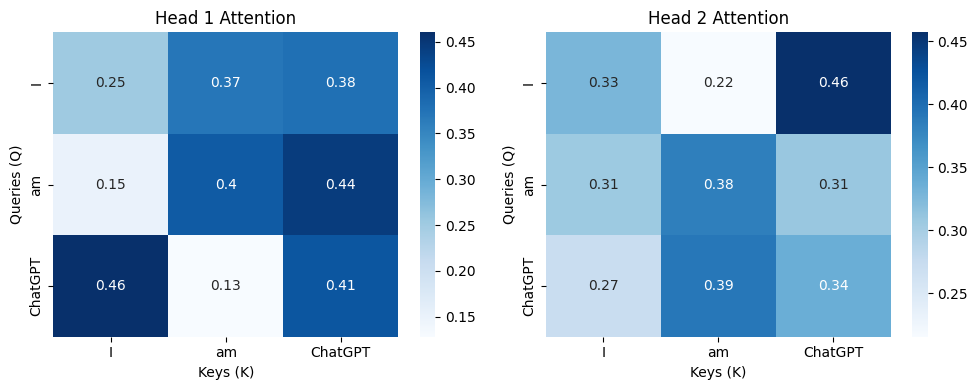

In [ ]:
#using torhc
import torch
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x, axis=-1):
    return torch.softmax(x, dim=axis)

def scaled_dot_product_attention(q, k, v, mask=None):
    d_k = q.size()[-1]
    # Transpose k for correct dot product
    scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(d_k)

    if mask is not None:
        scores += mask

    attention = F.softmax(scores, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

def multi_head_attention(q, k, v, num_heads=2):
    batch_size, seq_len, d_model = q.size()
    head_dim = d_model // num_heads
    assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

    # Split into multiple heads and rearrange dimensions
    def split_heads(x):
        return x.view(batch_size, seq_len, num_heads, head_dim).permute(0, 2, 1, 3)  # (batch_size, num_heads, seq_len, head_dim)

    q_heads = split_heads(q)
    k_heads = split_heads(k)
    v_heads = split_heads(v)

    # Compute attention for all heads in parallel
    attention_output, attention_weights = scaled_dot_product_attention(q_heads, k_heads, v_heads)

    # Concatenate all attention outputs
    attention_output = attention_output.permute(0, 2, 1, 3).contiguous().view(batch_size, seq_len, d_model)

    return attention_output, attention_weights

# Example setup
torch.manual_seed(2)
L, d_model, num_heads = 3, 4, 2  # Sequence length, model dimension, and number of heads
q = torch.randn(1, L, d_model)
k = torch.randn(1, L, d_model)
v = torch.randn(1, L, d_model)

# Apply efficient multi-head attention
output, attention_maps = multi_head_attention(q, k, v, num_heads=num_heads)

print("Output after Multi-Head Attention:\n", output)

# Plot the attention maps
tokens = ["I", "am", "ChatGPT"]
fig, axes = plt.subplots(1, num_heads, figsize=(10, 4))
attention_maps = attention_maps.squeeze(0).detach().numpy()

for i in range(num_heads):
    sns.heatmap(attention_maps[i], annot=True, cmap='Blues', xticklabels=tokens, yticklabels=tokens, cbar=True, ax=axes[i])
    axes[i].set_title(f"Head {i+1} Attention")
    axes[i].set_xlabel("Keys (K)")
    axes[i].set_ylabel("Queries (Q)")

plt.tight_layout()
plt.show()


In [ ]:

torch.manual_seed(2)
x=torch.randn(2,2)
print('x',x)
print('output')
torch.softmax(x,dim=-1)

x tensor([[ 0.3923, -0.2236],
        [-0.3195, -1.2050]])
output


tensor([[0.6493, 0.3507],
        [0.7080, 0.2920]])

In [ ]:
# input_dim = 1024
# d_model = 512
# num_heads = 8

# batch_size = 30
# sequence_length = 5
# x = torch.randn( (batch_size, sequence_length, input_dim) )

# model = MultiheadAttention(input_dim, d_model, num_heads)
# out = model.forward(x)

In [ ]:
input_dim = 2
d_model = 6
num_heads = 2

batch_size = 2
sequence_length = 3
torch.manual_seed(2)
x = torch.randn( (batch_size, sequence_length, input_dim) )

model = MultiheadAttention(input_dim, d_model, num_heads)
attention,out = model.forward(x)
print('x',x)
print('attention',attention.shape)
print('out',out.shape)

x.size(): torch.Size([2, 3, 2])
qkv.size(): torch.Size([2, 3, 18])
qkv.size(): torch.Size([2, 3, 2, 9])
qkv.size(): torch.Size([2, 2, 3, 9])
q size: torch.Size([2, 2, 3, 3]), k size: torch.Size([2, 2, 3, 3]), v size: torch.Size([2, 2, 3, 3]), 
values.size(): torch.Size([2, 2, 3, 3]), attention.size:torch.Size([2, 2, 3, 3]) 
values.size(): torch.Size([2, 3, 6])
out.size(): torch.Size([2, 3, 6])
x tensor([[[ 0.3923, -0.2236],
         [-0.3195, -1.2050],
         [ 1.0445, -0.6332]],

        [[ 0.5731,  0.5409],
         [-0.3919, -1.0427],
         [ 1.3186,  0.7476]]])
attention torch.Size([2, 2, 3, 3])
out torch.Size([2, 3, 6])


In [ ]:
#final perfect
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class multihead_attention(nn.Module):
    def __init__(self, inputdim, dmodel, masking=None, heads=1):
        super().__init__()
        self.heads = heads
        self.masking = masking
        assert dmodel % heads == 0, "Embedding dimension must be divisible by num_heads"
        self.inputdim = inputdim
        self.dmodel = dmodel
        self.head_dim = self.dmodel // self.heads
        self.wq = nn.Linear(self.inputdim, self.dmodel)
        self.wk = nn.Linear(self.inputdim, self.dmodel)
        self.wv = nn.Linear(self.inputdim, self.dmodel)
        self.linearlayer=nn.Linear(self.dmodel,self.dmodel)
        self.projectionlayer=nn.Linear(self.dmodel,self.inputdim)
        print('heads =', self.heads)

    def scaled_dot_product_attention(self, q, k, v):
        dk = torch.tensor(q.shape[-1], dtype=torch.float32)
        scaled = torch.matmul(q, k.transpose(-2, -1)) / torch.sqrt(dk)

        if self.masking is not None:
            mask = torch.ones(q.shape[2], q.shape[2], device=q.device)
            mask = torch.tril(mask)
            mask[mask == 0] = -torch.inf
            mask[mask == 1] = 0
            scaled = scaled + mask

        attention = torch.softmax(scaled, dim=-1)
        scores = torch.matmul(attention, v)
        return attention, scores

    def forward(self, x):
        batch_size, sequence_length, input_dim = x.size()
        q = self.wq(x)
        k = self.wk(x)
        v = self.wv(x)
        q = q.view(batch_size, sequence_length, self.heads, self.head_dim)
        k = k.view(batch_size, sequence_length, self.heads, self.head_dim)
        v = v.view(batch_size, sequence_length, self.heads, self.head_dim)
        q = q.permute(0, 2, 1, 3)
        k = k.permute(0, 2, 1, 3)
        v = v.permute(0, 2, 1, 3)

        attention, scores = self.scaled_dot_product_attention(q, k, v)
        print('scores init',scores)
        scores = scores.reshape(batch_size, sequence_length, self.heads *self.head_dim)# we can use self.dmodel as well as last arg
        print('scores out',scores)
        out=self.linearlayer(scores)
        print('out',out.shape)
        projected=self.projectionlayer(out)
        print('projected',projected.shape)
        return attention, scores,projected

def plot_multhead(attention, sentences):
    num_batches = attention.shape[0]
    num_heads = attention.shape[1]
    sequence_length = attention.shape[2]

    fig, axes = plt.subplots(num_batches, num_heads, figsize=(5 * num_heads, 5 * num_batches))
    if num_heads == 1:
        axes = [axes]
    if num_batches == 1:
        axes = [axes]

    for batch_idx in range(num_batches):
        for head_idx in range(num_heads):
            ax = axes[batch_idx][head_idx] if num_batches > 1 else axes[head_idx]
            sns.heatmap(attention[batch_idx, head_idx].detach().numpy(), annot=True, cmap="Blues", ax=ax)
            sentence = sentences[batch_idx]
            ax.set_title(f"Attention Heatmap for Batch {batch_idx + 1}, Head {head_idx + 1}")
            ax.set_xticklabels(sentence, rotation=45, ha="right")
            ax.set_yticklabels(sentence, rotation=0)

    plt.tight_layout()
    plt.show()

torch.manual_seed(2)
input_dim = 2
d_model = 6
num_heads = 2
batch_size = 2
sequence_length = 3

x = torch.randn(batch_size, sequence_length, input_dim)
print('Input x:', x)
multiattention = multihead_attention(input_dim, d_model, heads=num_heads, masking=True)

attention, values,out = multiattention(x)

print("Attention:", attention)
print('attention shape', attention.shape)
print("values:", values)
print("values shape:", values.shape)
print("out:", out)
print("out shape:", out.shape)#linear laer output
sentences = [["I", "am", "GPT"], ["Good", "to", "know"]]
#plot_multhead(attention, sentences)

Input x: tensor([[[ 0.3923, -0.2236],
         [-0.3195, -1.2050],
         [ 1.0445, -0.6332]],

        [[ 0.5731,  0.5409],
         [-0.3919, -1.0427],
         [ 1.3186,  0.7476]]])
heads = 2
scores init tensor([[[[-0.1892,  0.1529,  0.2221],
          [-0.0320, -0.2258,  0.0192],
          [ 0.0825, -0.1731,  0.2062]],

         [[ 0.3649, -0.0970, -1.0514],
          [ 0.6609, -0.2058, -1.1408],
          [ 0.6900, -0.2531, -1.3004]]],


        [[[-0.5864,  0.7097,  0.3272],
          [-0.3100,  0.1327,  0.0610],
          [-0.2955,  0.2653,  0.2130]],

         [[-0.0998,  0.1258, -0.6970],
          [ 0.4480, -0.0925, -0.9322],
          [ 0.2983, -0.0521, -0.9473]]]], grad_fn=<UnsafeViewBackward0>)
scores out tensor([[[-0.1892,  0.1529,  0.2221, -0.0320, -0.2258,  0.0192],
         [ 0.0825, -0.1731,  0.2062,  0.3649, -0.0970, -1.0514],
         [ 0.6609, -0.2058, -1.1408,  0.6900, -0.2531, -1.3004]],

        [[-0.5864,  0.7097,  0.3272, -0.3100,  0.1327,  0.0610],
        

In [ ]:

import torch
import torch.nn as nn
import math

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = torch.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

class MultiheadAttention(nn.Module):

    def __init__(self, input_dim, d_model, num_heads):
        super().__init__()
        self.input_dim = input_dim
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(input_dim , 3 * d_model)
        self.linear_layer = nn.Linear(d_model, d_model)

    def forward(self, x, mask=None):
        batch_size, sequence_length, input_dim = x.size()
        print(f"x.size(): {x.size()}")
        qkv = self.qkv_layer(x)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.reshape(batch_size, sequence_length, self.num_heads, 3 * self.head_dim)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.permute(0, 2, 1, 3)
        print(f"qkv.size(): {qkv.size()}")
        q, k, v = qkv.chunk(3, dim=-1)
        print(f"q size: {q.size()}, k size: {k.size()}, v size: {v.size()}, ")
        values, attention = scaled_dot_product(q, k, v, mask)
        print(f"values.size(): {values.size()}, attention.size:{ attention.size()} ")
        values = values.reshape(batch_size, sequence_length, self.num_heads * self.head_dim)
        print(f"values.size(): {values.size()}")
        out = self.linear_layer(values)
        print(f"out.size(): {out.size()}")
        return out

input_dim = 2
d_model = 6
num_heads = 2

batch_size = 2
sequence_length = 3
x = torch.randn( (batch_size, sequence_length, input_dim) )

model = MultiheadAttention(input_dim, d_model, num_heads)
out = model.forward(x)

x.size(): torch.Size([2, 3, 2])
qkv.size(): torch.Size([2, 3, 18])
qkv.size(): torch.Size([2, 3, 2, 9])
qkv.size(): torch.Size([2, 2, 3, 9])
q size: torch.Size([2, 2, 3, 3]), k size: torch.Size([2, 2, 3, 3]), v size: torch.Size([2, 2, 3, 3]), 
values.size(): torch.Size([2, 2, 3, 3]), attention.size:torch.Size([2, 2, 3, 3]) 
values.size(): torch.Size([2, 3, 6])
out.size(): torch.Size([2, 3, 6])


x→Linear
1
​
 →ReLU→Linear
2
​
 →Dropout→Residual Connection→LayerNorm

In [ ]:
#linear layer class
import torch.nn as nn
import torch
class feedforward(nn.Module):
  def __init__(self,d_model,hidlayer,dropout):
    super().__init__()
    self.d_model=d_model
    self.hidlayer=hidlayer
    self.linearlayer1=nn.Linear(self.d_model,self.hidlayer)
    self.linearlayer2=nn.Linear(self.hidlayer,self.d_model)
    self.dropout=nn.Dropout(dropout)
    self.activation=nn.ReLU()

  def forward(self,x):
    l1=self.linearlayer1(x)
    print(f"x after first linear layer: {x.size()}")
    l1=self.activation(l1)
    print(f"x after activation: {l1.size()}")
    l1=self.dropout(l1)
    print(f"x after dropout: {l1.size()}")
    out=self.linearlayer2(l1)
    print(f"x after 2nd linear layer: {out.size()}")

    # drop out gen not aplpied after 1st layhers
    #out=self.dropout(l2)
    return out

torch.manual_seed(2)
x=torch.randn(2,3,2)
print('x',x)
linlayer=feedforward(d_model=x.shape[-1],hidlayer=4,dropout=0.2)
out=linlayer(x)
print('output',out)

x tensor([[[ 0.3923, -0.2236],
         [-0.3195, -1.2050],
         [ 1.0445, -0.6332]],

        [[ 0.5731,  0.5409],
         [-0.3919, -1.0427],
         [ 1.3186,  0.7476]]])
x after first linear layer: torch.Size([2, 3, 2])
x after activation: torch.Size([2, 3, 4])
x after dropout: torch.Size([2, 3, 4])
x after 2nd linear layer: torch.Size([2, 3, 2])
output tensor([[[-0.0033, -0.0869],
         [-0.3580, -0.0473],
         [-0.0640, -0.1487]],

        [[ 0.1065,  0.0664],
         [-0.1907, -0.1241],
         [ 0.1290,  0.1307]]], grad_fn=<ViewBackward0>)
